# Combine data from different sources: 

In [1]:
from bs_fdbck_clean.constants import path_measurement_data

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/bs_fdbck_clean/data_info


In [2]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

### Input data:


In [3]:
path_sizedist_ATTO = path_measurement_data /'ATTO'#'sizedistrib' 

In [4]:
list(path_sizedist_ATTO.glob('*'))

[PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/ATTO/QACSM_time_series_C4_60m_2014_2016STP_v3.xlsx'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/ATTO/meteo'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/ATTO/ATTO_BC_Sara.xlsx'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/ATTO/acsm_data_for_sara_2017.txt'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/ATTO/meteodataComplete.dat'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/ATTO/ds_atto_2014_2019_4Sara.nc')]

In [5]:
path_acsm = path_measurement_data / 'ATTO'/ 'QACSM_time_series_C4_60m_2014_2016STP_v3.xlsx'
path_acsm2017 = path_measurement_data / 'ATTO'/ 'acsm_data_for_sara_2017.txt'

In [6]:
path_bc = path_measurement_data / 'ATTO'/'ATTO_BC_Sara.xlsx'

In [7]:
fn_theo = path_measurement_data / 'ATTO'/ 'ds_atto_2014_2019_4Sara.nc'

In [8]:
fn_meteo = path_measurement_data / 'ATTO'/ 'meteodataComplete.dat'
fn_meteo_dir = path_measurement_data / 'ATTO'/'meteo'# 'meteodataComplete.dat'

### Output data

In [9]:
postproc_data = path_measurement_data /'ATTO'/'processed'
postproc_data.mkdir( exist_ok=True)

path_acsm_daily_median = postproc_data /'daily_median_QACSM_time_series_C4_60m_2014_2016STP_v3.csv'

path_comb_data =postproc_data /'ATTO_data_comb_daily.nc'
path_comb_data_full_time =postproc_data /'ATTO_data_comb_hourly.nc'

In [10]:
path_comb_data_full_time

PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/ATTO/processed/ATTO_data_comb_hourly.nc')

### Read in acsm data

In [11]:
df_ATTO = pd.read_excel(path_acsm, sheet_name=0, index_col=0, parse_dates=[0])#'QACSM 60m v3')

In [12]:
df_ATTO.index = df_ATTO.index.rename('time')

In [13]:
df_ATTO

,org (ug m-3),sul,nit,am,chl,BC MAAP
time,,,,,,
2014-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2017-01-03 11:00:00,NaN,NaN,NaN,NaN,NaN,0.037476
2017-01-03 11:30:00,NaN,NaN,NaN,NaN,NaN,0.045721
2017-01-03 12:00:00,NaN,NaN,NaN,NaN,NaN,0.049703


### Read in acsm data 2017

In [14]:
rn_acsm_names = {
    'Org':'org (ug m-3)',
    'SO4':'sul',
    'NO3':'nit',
    'N4' :'am',
    'Chl':'chl',
}
    

In [15]:
df_acsm2017 = pd.read_csv(path_acsm2017,parse_dates=[0], index_col=0 )#'QACSM 60m v3')

In [16]:
df_acsm2017 = df_acsm2017.rename(rn_acsm_names, axis=1)

In [17]:
df_ATTO = pd.concat([df_ATTO, df_acsm2017], axis=0)

## ATTO is at UTC - 4: convert to local time 

In [18]:
import datetime

In [19]:
df_ATTO.index

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 00:30:00',
               '2014-01-01 01:00:00', '2014-01-01 01:30:00',
               '2014-01-01 02:00:00', '2014-01-01 02:30:00',
               '2014-01-01 03:00:00', '2014-01-01 03:30:00',
               '2014-01-01 04:00:00', '2014-01-01 04:30:00',
               ...
               '2017-12-31 20:00:00', '2017-12-31 20:30:00',
               '2017-12-31 21:00:00', '2017-12-31 21:30:00',
               '2017-12-31 22:00:00', '2017-12-31 22:30:00',
               '2017-12-31 23:00:00', '2017-12-31 23:30:00',
               '2018-01-01 00:00:00', '2018-01-01 00:30:00'],
              dtype='datetime64[ns]', name='time', length=70252, freq=None)

In [20]:
if 'time_utc' not in df_ATTO.columns:
    time_ind = pd.to_datetime(df_ATTO.index)# -datetime.timedelta(hours=4)
    df_ATTO['time_utc'] =time_ind
    time_ind_local_time = time_ind - datetime.timedelta(hours=4)
    time_ind_local_time
    df_ATTO.index = time_ind_local_time
    print('converted time to local time')

converted time to local time


In [21]:
df_ATTO_daily_med = df_ATTO.resample('1D').median()

<AxesSubplot:xlabel='time'>

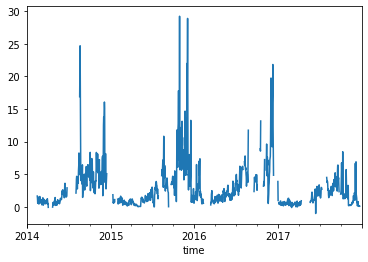

In [22]:
df_ATTO_daily_med['org (ug m-3)'].plot()

In [23]:
df_ATTO_daily_med['org (ug m-3)']

time
2013-12-31   NaN
2014-01-01   NaN
2014-01-02   NaN
2014-01-03   NaN
2014-01-04   NaN
              ..
2017-12-27   NaN
2017-12-28   NaN
2017-12-29   NaN
2017-12-30   NaN
2017-12-31   NaN
Freq: D, Name: org (ug m-3), Length: 1462, dtype: float64

In [24]:
df_ATTO_daily_med = df_ATTO_daily_med.rename({'org (ug m-3)':'Org'}, axis=1)

In [25]:
df_ATTO_daily_med.to_csv(path_acsm_daily_median)

## BC data

In [26]:
df_ATTO_bc = pd.read_excel(path_bc,parse_dates=[0], index_col=0, header=None, )
df_ATTO_bc

,1
0,
2014-01-01 00:00:00,1.86818
2014-01-01 00:05:00,1.90820
2014-01-01 00:10:00,1.98772
2014-01-01 00:15:00,1.98582
2014-01-01 00:20:00,1.96204
...,...
2022-10-31 23:35:00,NaN
2022-10-31 23:40:00,NaN
2022-10-31 23:45:00,NaN


In [27]:
df_ATTO_bc = df_ATTO_bc.rename({1:'BC_conc',},axis=1)

In [28]:
df_ATTO_bc.index.name ='time'

In [29]:
if 'time_utc' not in df_ATTO_bc.columns:
    time_ind = pd.to_datetime(df_ATTO_bc.index)# -datetime.timedelta(hours=4)
    df_ATTO_bc['time_utc'] =time_ind
    time_ind_local_time = time_ind - datetime.timedelta(hours=4)
    df_ATTO_bc.index = time_ind_local_time
    print('converted time to local time')

converted time to local time


<AxesSubplot:xlabel='time'>

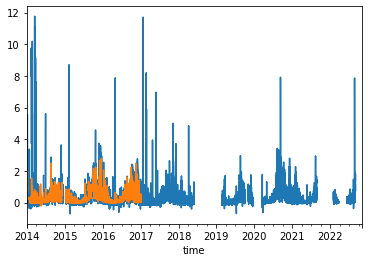

In [30]:
df_ATTO_bc['BC_conc'].plot()

df_ATTO['BC MAAP'].plot()

In [31]:
df_ATTO_bc_hourly_mean = df_ATTO_bc.resample('h').mean()


In [32]:
df_ATTO_bc_hourly_mean

,BC_conc
time,
2013-12-31 20:00:00,2.022737
2013-12-31 21:00:00,2.063817
2013-12-31 22:00:00,2.246422
2013-12-31 23:00:00,2.164815
2014-01-01 00:00:00,2.141033
...,...
2022-10-31 15:00:00,NaN
2022-10-31 16:00:00,NaN
2022-10-31 17:00:00,NaN


<AxesSubplot:xlabel='time'>

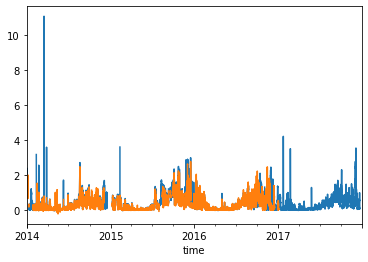

In [33]:
df_ATTO_bc_hourly_mean['BC_conc'].loc['2014':'2017'].plot()
df_ATTO['BC MAAP'].plot()

<AxesSubplot:xlabel='time'>

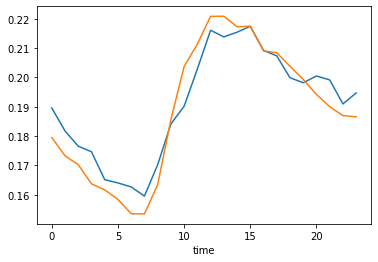

In [34]:
df_ATTO['BC MAAP'].groupby(df_ATTO.index.hour).median().plot()
df_ATTO_bc_hourly_mean['BC_conc'].groupby(df_ATTO_bc_hourly_mean.index.hour).median().plot()

## Data from Theodore (all data will be added to this dataset)

In [35]:
ds = xr.open_dataset(fn_theo, engine='netcdf4')
ds['timeUTC-3'] = ds['time'].copy()

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [36]:
ds


<xarray.Dataset>
Dimensions:                (D: 104, time: 25448, time_traj: 121)
Coordinates:
  * D                      (D) float64 10.2 10.6 10.9 11.3 ... 385.4 399.5 414.2
  * time                   (time) datetime64[ns] 2014-03-10T16:00:00 ... 2019...
  * time_traj              (time_traj) int64 0 1 2 3 4 5 ... 116 117 118 119 120
Data variables: (12/20)
    pnsd                   (time, D) float64 ...
    Pressure               (time, time_traj) float64 ...
    Potential_Temperature  (time, time_traj) float64 ...
    Temperature            (time, time_traj) float64 ...
    Rainfall               (time, time_traj) float64 ...
    Mixing_Depth           (time, time_traj) float64 ...
    ...                     ...
    condensation_sink      (time) float64 ...
    pnsd_nolog             (time, D) float64 ...
    N50                    (time) float64 ...
    N100                   (time) float64 ...
    N200                   (time) float64 ...
    timeUTC-3              (time) datetime64[ns] 2014-03-10T16:00:00 ... 2019...

### Seems like Theos data is UTC-3, so we shift all to -4

In [37]:
if 'timeUTC-4' not in ds:
    ds['timeUTC'] = pd.to_datetime(ds['timeUTC-3']) + datetime.timedelta(hours=3)
    ds['timeUTC-4'] = pd.to_datetime(ds['timeUTC']) - datetime.timedelta(hours=4)
    ds['time'] = ds['timeUTC-4'].values
    print('shifted timezone from UTC-3 to UTC-4')

shifted timezone from UTC-3 to UTC-4


### Recalculate N50, N100 etc

In [38]:
from bs_fdbck_clean.util.EBAS_data.sizedistribution_integration import calc_Nx_interpolate_first

In [39]:
for x in [50,100,200]:
    ds[f'N{x}_new']=calc_Nx_interpolate_first(ds, x=x,
                              var_diam='D',
                              v_dNdlog10D='pnsd')



/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/missing.py:559: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/missing.py:560: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/missing.py:559: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/missing.py:560: 

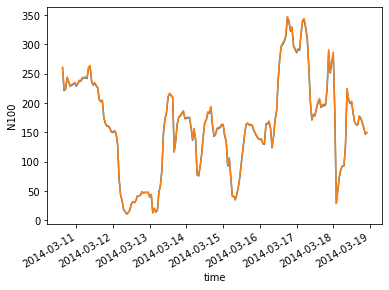

In [40]:
ds['N100_new'].isel(time=slice(0,200)).plot()


ds['N100'].isel(time=slice(0,200)).plot()


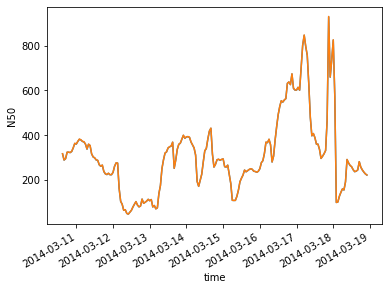

In [41]:
ds['N50_new'].isel(time=slice(0,200)).plot()


ds['N50'].isel(time=slice(0,200)).plot()


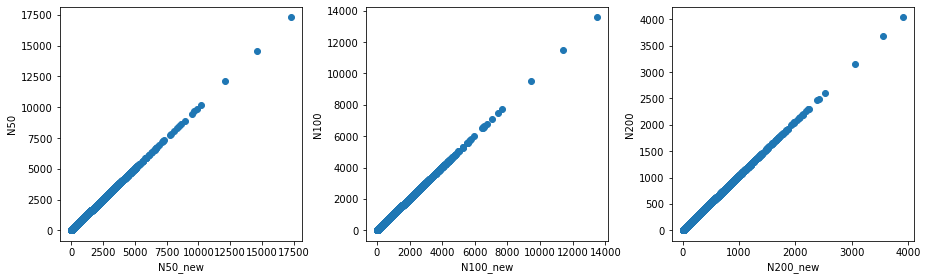

In [42]:
fig, axs = plt.subplots(1,3, figsize=[13,4])

for i,v in enumerate(['N50','N100','N200']):
    ax = axs[i]
    ds.plot.scatter(x=f'{v}_new', y=v,  ax = ax)
    #ax.set_yscale('log')
    #ax.set_xscale('log')
fig.tight_layout()

### Replace old values (even though the same) 

In [43]:
for i,v in enumerate(['N50','N100','N200']):
    ds[v] = ds[f'{v}_new']


In [44]:
import matplotlib.pyplot as plt

## Read and fix meteo data 2 (not from re analysis):

In [45]:
def replace_no(x):
    if len(x)==0:
        return '0'
    else:
        return x

def make_datetime(_df):
    _df['hour'] = _df['Time'].apply(lambda x:replace_no(str(x)[:-2])).astype(int)

    _df['minute'] = _df['Time'].apply(lambda x: replace_no(str(x)[-2:])).astype(int)
    _df['year'] = _df['Yr']
    _df['day'] = _df['Timestamps'].apply(lambda x: int(x.split('.')[0]))
    _df['month'] = _df['Timestamps'].apply(lambda x: int(x.split('.')[1]))

    return pd.to_datetime(_df[['minute', 'hour', 'month','day','year']])

In [46]:
fl = list(fn_meteo_dir.glob('*.txt'))
fl.sort()
fl

[PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/ATTO/meteo/35_INST_aws_precertified_30min_2014.txt'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/ATTO/meteo/35_INST_aws_precertified_30min_2015.txt'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/ATTO/meteo/35_INST_aws_precertified_30min_2016.txt'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/ATTO/meteo/35_INST_aws_precertified_30min_2017.txt'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/ATTO/meteo/35_INST_aws_precertified_30min_2018.txt')]

In [47]:
f = fl[0]
ls_met_df = list()
for f in fl:
    _df = pd.read_csv(f, sep='\t', decimal=",")
    _df['TimeUTC'] =make_datetime(_df) 
    _df = _df.set_index('TimeUTC')
    ls_met_df.append(_df)

In [48]:
df_meteo2 = pd.concat(ls_met_df)

In [49]:
df_meteo2 = df_meteo2.replace(-9999.,np.nan)

<AxesSubplot:xlabel='TimeUTC'>

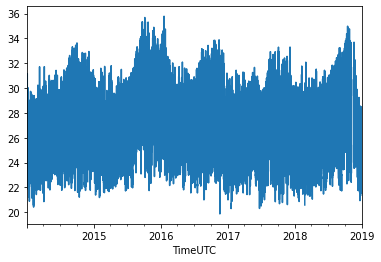

In [50]:
df_meteo2['T_81m'].plot()

### Read old meteo meteo data:

In [51]:
df_met = pd.read_csv(fn_meteo, sep='\t', index_col=0)

In [52]:
df_met = df_met.replace(9999,np.nan).rename({' temperature':'temperature'}, axis=1)

In [53]:
df_met.index = pd.to_datetime(df_met.index)

<AxesSubplot:xlabel='TimeUTC'>

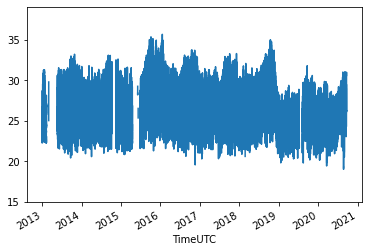

In [54]:
df_met['temperature'].plot()

<AxesSubplot:xlabel='TimeUTC'>

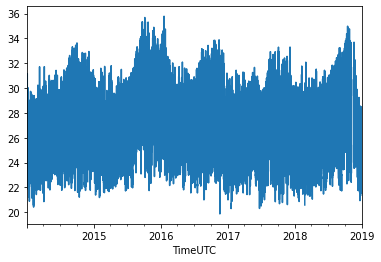

In [55]:
df_meteo2['T_81m'].plot()

In [56]:
vars_to_add_meteo = ['pressure', 'temperature', 'humidity', 'wind_dir', 'precip',
       'Solar_inc_Wm2', 'Solar_out_Wm2', 'wind_speed', 'wind_speed_v']


In [57]:
df_meteo2.columns

Index(['Timestamps', 'Yr', 'Doy', 'Time', 'T_81m', 'T_73m', 'T_55m', 'T_40m',
       'T_36m', 'T_26m', 'T_12m', 'T_4m', 'T_1.5m', 'T_0.4m', 'RH_81m',
       'RH_73m', 'RH_55m', 'RH_40m', 'RH_36m', 'RH_26m', 'RH_12m', 'RH_4m',
       'RH_1.5m', 'RH_0.4m', 'SW_in', 'SW_out', 'PAR_in', 'PAR_out', 'UV',
       'NetRad', 'AirPress_81m', 'Rainfall', 'WSp_73m', 'WDir_73m', 'WSp_65m',
       'WDir_65m', 'WSp_50m', 'WDir_50m', 'WSp_42m', 'WDir_42m', 'WSp_26m',
       'WDir_26m', 'WSp_19m', 'WDir_19m', 'LW_atm', 'LW_terr', 'hour',
       'minute', 'year', 'day', 'month'],
      dtype='object')

In [58]:
vars_to_add_meteo2 = ['AirPress_81m', 'T_81m', 'RH_81m', 'WSp_73m','WDir_73m' ,'Rainfall',
       'PAR_in', 'PAR_out',  'LW_atm', 'LW_terr',]

dic_old2new_metfile=dict(
    AirPress_81m = 'pressure',
    T_81m = 'temperature',
    RH_81m='humidity',
    Rainfall='precip',
    
    
)

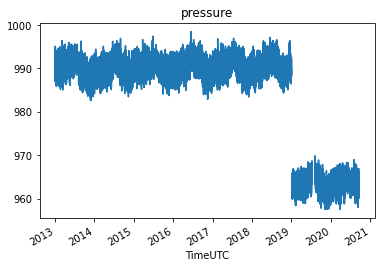

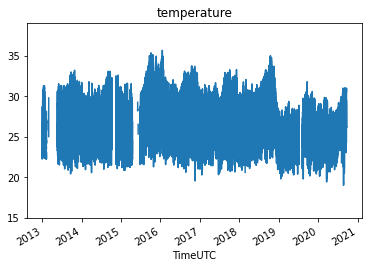

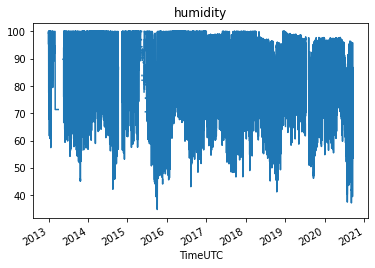

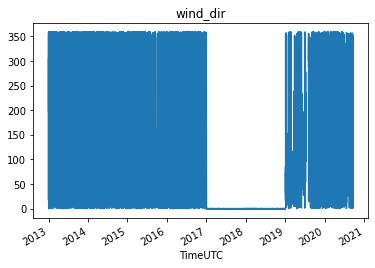

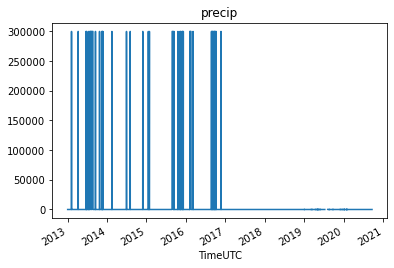

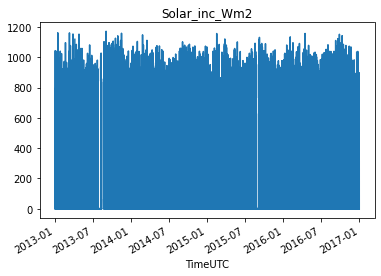

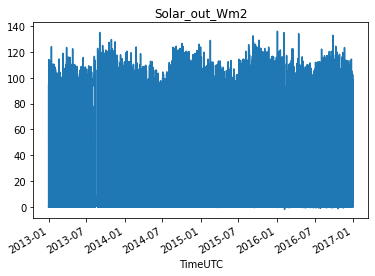

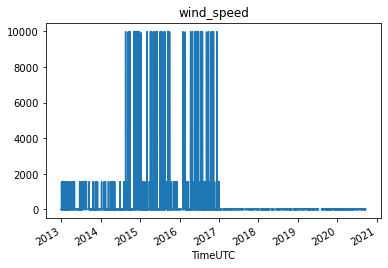

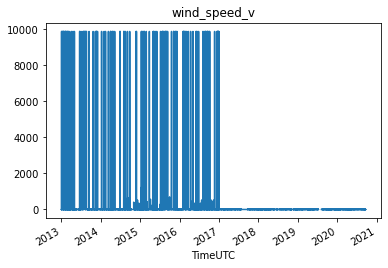

In [59]:

for v in vars_to_add_meteo:
    df_met[v].plot()
    plt.title(v)
    plt.show()

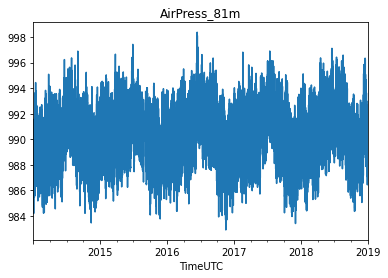

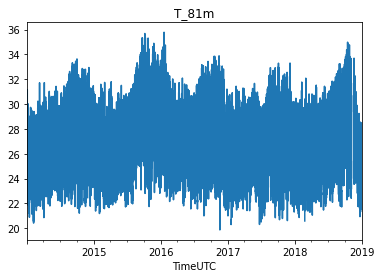

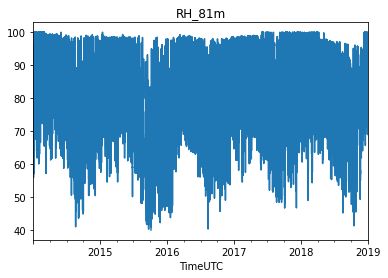

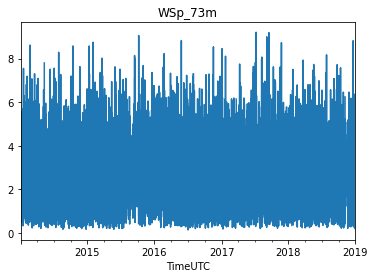

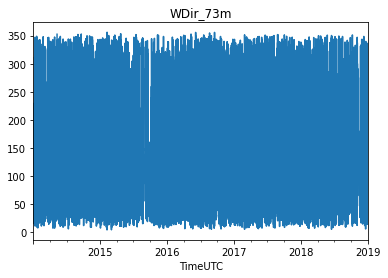

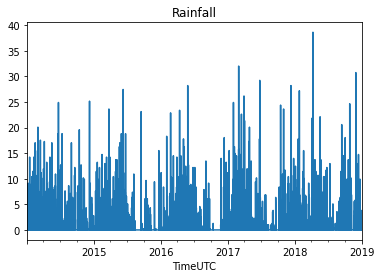

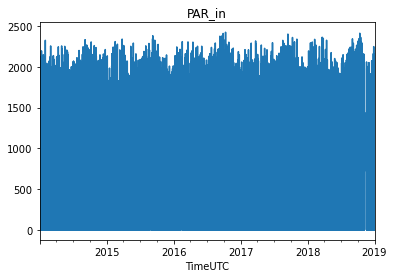

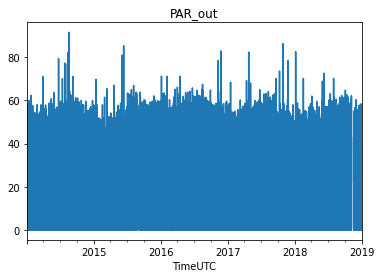

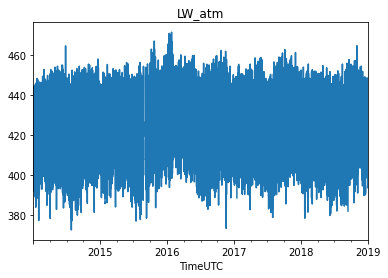

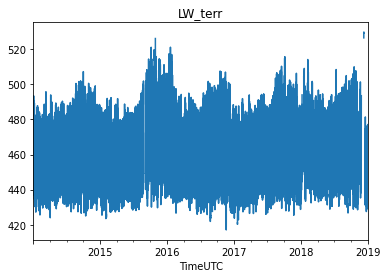

In [60]:

for v in vars_to_add_meteo2:
    df_meteo2[v].plot()
    plt.title(v)
    plt.show()

<AxesSubplot:xlabel='TimeUTC'>

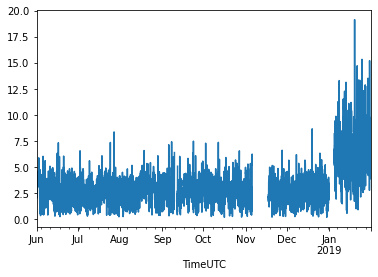

In [61]:
df_met['wind_speed'].loc['2018-06':'2019-01'].plot()

<AxesSubplot:xlabel='TimeUTC'>

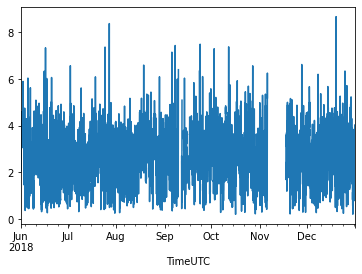

In [62]:
df_met['wind_speed'].loc['2018-06':'2018-12'].plot()

<AxesSubplot:xlabel='TimeUTC'>

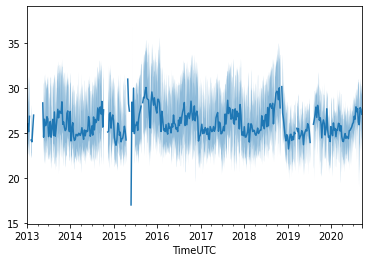

In [63]:
ts = df_met['temperature']
ma = ts.resample('1d').max()#.plot(alpha=0.5, label='ECHAM-SALSA', c='r')
mi = ts.resample('1d').min()#.plot(alpha=0.5, label='ECHAM-SALSA', c='r')
plt.fill_between(ma.index, mi, ma,alpha=0.5, label='ECHAM-SALSA')
ts.resample('7d').mean().plot()

<AxesSubplot:xlabel='TimeUTC'>

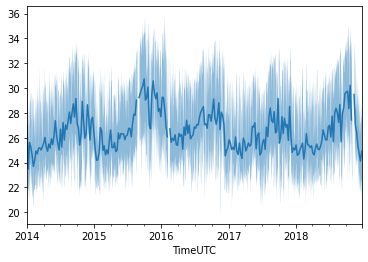

In [64]:
ts = df_meteo2['T_81m']
ma = ts.resample('1d').max()#.plot(alpha=0.5, label='ECHAM-SALSA', c='r')
mi = ts.resample('1d').min()#.plot(alpha=0.5, label='ECHAM-SALSA', c='r')
plt.fill_between(ma.index, mi, ma,alpha=0.5, label='ECHAM-SALSA')
ts.resample('7d').mean().plot()

### Due to the change in the position of the instrument, we only use data up until end of 2018 (which is also when the model runs stop)

In [65]:
df_met = df_met.loc['2012-01':'2018-12']

In [66]:
df_met.loc[df_met['wind_speed']>100, 'wind_speed'] = np.nan
df_met.loc[df_met['wind_speed_v']>100,'wind_speed_v'] = np.nan

In [67]:
df_met.loc[df_met['precip']>4000,'precip'] = np.nan
#.plot()

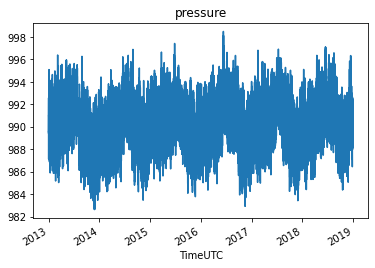

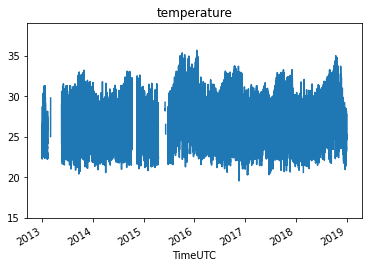

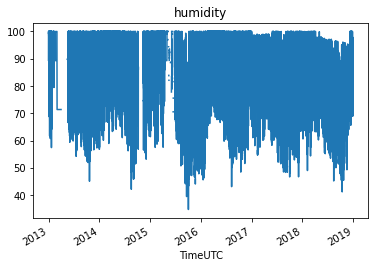

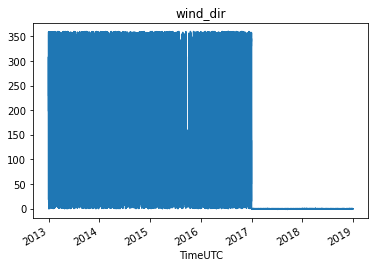

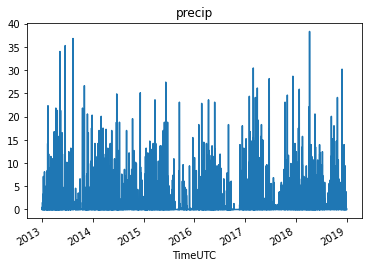

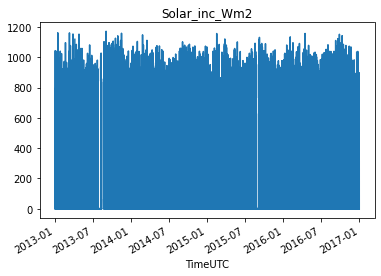

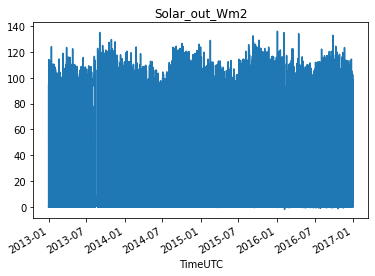

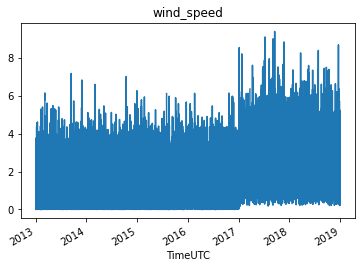

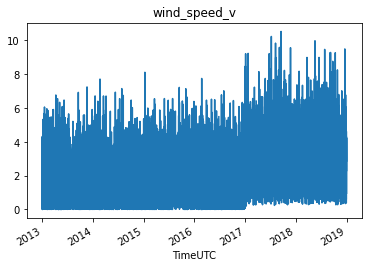

In [68]:

for v in vars_to_add_meteo:
    df_met[v].plot()
    plt.title(v)
    plt.show()

### Check timezone meteo2:

Only difference in left or right labeled. 

<AxesSubplot:xlabel='TimeUTC'>

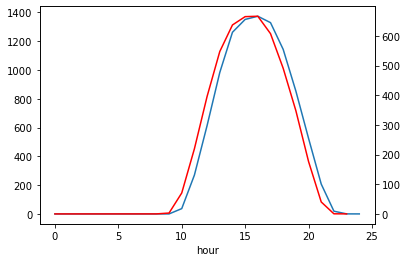

In [69]:
fig, ax = plt.subplots()
df_meteo2.groupby('hour').mean()['PAR_in'].plot()
df_met.loc['2014-01':'2019-01'].groupby(df_met.loc['2014-01':'2019-01'].index.hour).mean()['Solar_inc_Wm2'].plot(ax = ax.twinx(), c='r')


<AxesSubplot:xlabel='TimeUTC'>

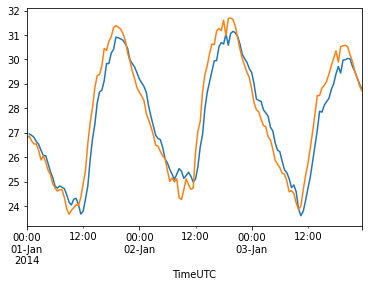

In [70]:
df_meteo2.loc['2014-01-01':'2014-01-03']['T_81m'].plot()
df_met.loc['2014-01-01':'2014-01-03']['temperature'].plot()

<AxesSubplot:xlabel='TimeUTC'>

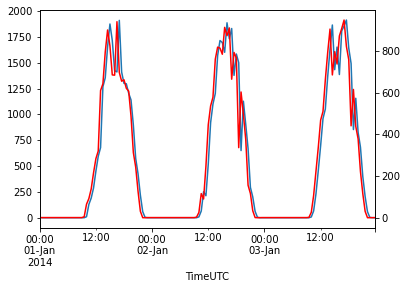

In [71]:
fig, ax = plt.subplots()

df_meteo2.loc['2014-01-01':'2014-01-03']['PAR_in'].plot()
df_met.loc['2014-01-01':'2014-01-03']['Solar_inc_Wm2'].plot(ax=ax.twinx(), c='r')

Half an hour difference due to right verus left labeling of timestep

In [72]:
df_met

,pressure,temperature,humidity,wind_dir,precip,Solar_inc_Wm2,Solar_out_Wm2,wind_speed,wind_speed_v
TimeUTC,,,,,,,,,
2013-01-01 00:00:00,989.650000,24.028000,99.343000,199.290000,0.0,0.0,0.0,1.238343,0.433419
2013-01-01 00:30:00,989.830000,24.003000,99.533000,239.720000,0.0,0.0,0.0,0.470277,0.805427
2013-01-01 01:00:00,990.110000,23.782000,99.727000,257.590000,0.0,0.0,0.0,0.336048,1.527164
2013-01-01 01:30:00,990.410000,23.742000,100.000000,265.830000,0.0,0.0,0.0,0.091455,1.254370
2013-01-01 02:00:00,990.390000,23.698000,99.930000,308.420000,0.0,0.0,0.0,0.665729,0.839338
...,...,...,...,...,...,...,...,...,...
2018-12-31 21:30:00,988.864537,26.719333,79.080333,-0.080146,0.0,NaN,NaN,2.082000,2.206203
2018-12-31 22:00:00,988.954417,26.081000,82.218333,-0.125967,0.0,NaN,NaN,2.668667,2.705537
2018-12-31 22:30:00,989.126653,25.232000,86.443333,-0.105181,0.0,NaN,NaN,2.428333,2.482536


#### Go from UTC time to local time

In [73]:
if 'TimeLocal' not in df_met.columns:
    df_met = df_met.reset_index()
    df_met['TimeLocal'] = pd.to_datetime(df_met['TimeUTC']) - datetime.timedelta(hours=4)

    df_met = df_met.set_index('TimeLocal')
    print('shifted timezone from UTC to UTC-4')


shifted timezone from UTC to UTC-4


In [74]:
if 'TimeLocal' not in df_met.columns: 
    df_meteo2 = df_meteo2.reset_index()
    df_meteo2['TimeLocal'] = pd.to_datetime(df_meteo2['TimeUTC']) - datetime.timedelta(hours=4)

    df_meteo2 = df_meteo2.set_index('TimeLocal')
    print('shifted timezone from UTC to UTC-4')


shifted timezone from UTC to UTC-4


In [75]:
df_met['hour'] = df_met.index.hour

In [76]:
df_meteo2['hour'] = df_meteo2.index.hour

In [77]:
df_met['temperature']

TimeLocal
2012-12-31 20:00:00    24.028000
2012-12-31 20:30:00    24.003000
2012-12-31 21:00:00    23.782000
2012-12-31 21:30:00    23.742000
2012-12-31 22:00:00    23.698000
                         ...    
2018-12-31 17:30:00    26.719333
2018-12-31 18:00:00    26.081000
2018-12-31 18:30:00    25.232000
2018-12-31 19:00:00    24.567333
2018-12-31 19:30:00    25.272333
Name: temperature, Length: 105167, dtype: float64

In [78]:
df_meteo2['T_81m']

TimeLocal
2013-12-31 20:30:00    26.95
2013-12-31 21:00:00    26.89
2013-12-31 21:30:00    26.81
2013-12-31 22:00:00    26.64
2013-12-31 22:30:00    26.52
                       ...  
2018-12-31 18:00:00    26.71
2018-12-31 18:30:00    26.05
2018-12-31 19:00:00    25.21
2018-12-31 19:30:00    24.57
2018-12-31 20:00:00    25.29
Name: T_81m, Length: 87648, dtype: float64

In [79]:
df_met.columns

Index(['TimeUTC', 'pressure', 'temperature', 'humidity', 'wind_dir', 'precip',
       'Solar_inc_Wm2', 'Solar_out_Wm2', 'wind_speed', 'wind_speed_v', 'hour'],
      dtype='object')

<AxesSubplot:xlabel='hour'>

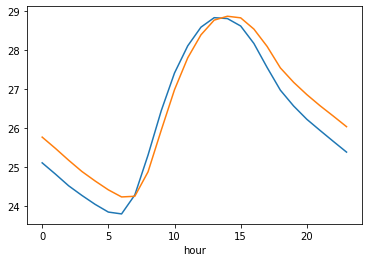

In [80]:
df_met_daily_med = df_met.resample('D').median()

df_met_daily_cycle = df_met.groupby(df_met['hour']).mean()

df_met_daily_cycle['temperature'].plot()

df_met_daily_med = df_meteo2.resample('D').median()

df_met_daily_cycle = df_meteo2.groupby(df_meteo2['hour']).mean()

df_met_daily_cycle['T_81m'].plot()

In [81]:
ds

<xarray.Dataset>
Dimensions:                (D: 104, time: 25448, time_traj: 121, timeUTC: 25448, timeUTC-4: 25448, limit: 2)
Coordinates:
  * D                      (D) float64 10.2 10.6 10.9 11.3 ... 385.4 399.5 414.2
  * time                   (time) datetime64[ns] 2014-03-10T15:00:00 ... 2019...
  * time_traj              (time_traj) int64 0 1 2 3 4 5 ... 116 117 118 119 120
  * timeUTC                (timeUTC) datetime64[ns] 2014-03-10T19:00:00 ... 2...
  * timeUTC-4              (timeUTC-4) datetime64[ns] 2014-03-10T15:00:00 ......
  * limit                  (limit) <U6 'bottom' 'top'
Data variables: (12/29)
    pnsd                   (time, D) float64 ...
    Pressure               (time, time_traj) float64 ...
    Potential_Temperature  (time, time_traj) float64 ...
    Temperature            (time, time_traj) float64 ...
    Rainfall               (time, time_traj) float64 ...
    Mixing_Depth           (time, time_traj) float64 ...
    ...                     ...
    diam_lims              (limit, D) float64 10.01 10.4 10.75 ... 406.8 421.8
    dlog10D                (D) float64 0.01671 0.01441 ... 0.01565 0.01569
    dN                     (time, D) float64 1.138e-06 0.02022 ... 0.8689 0.3272
    N50_new                (time) float64 316.4 288.4 294.9 ... 7.112 1.091
    N100_new               (time) float64 259.8 221.1 223.7 ... 4.941 1.091
    N200_new               (time) float64 123.4 102.3 104.5 ... 1.552 1.091

In [82]:
_ds = ds.groupby('time.hour').mean()

In [83]:
ds['hour'] = ds['time.hour']

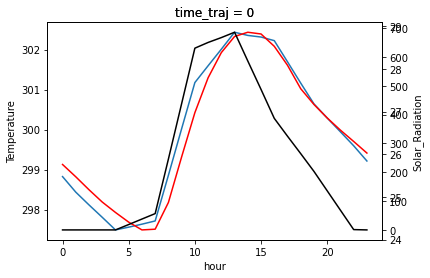

In [84]:
f,ax = plt.subplots()
ds['Temperature'].isel(time_traj=0).groupby(ds['hour']).mean().plot()

df_met_daily_cycle['T_81m'].plot(ax = ax.twinx(), c='r')

ds['Solar_Radiation'].isel(time_traj=0).groupby(ds['hour']).mean().plot(ax = ax.twinx(), c='k')


### Add meteo variables to final dataset and rename reanalysis variables

In [85]:
ds = ds.rename(dict(
    Pressure='Pressure_reanalysis',
    Temperature='Temperature_reanalysis',
    Potential_Temperature='Potential_Temperature_reanalysis',
    Specific_Humidity = 'Specific_Humidity_reanalysis',
    
    
))
ds = ds.rename(dict(
    N50='N50-500',
    N100 ='N100-500',
    N200 ='N200-500',
))

**Next one not used anymore**

from_dt = ds['time'].isel(time=0).values
to_dt = ds['time'].isel(time=-1).values


for v in vars_to_add_meteo:
    xa = xr.DataArray(df_met[v]).rename(dict(TimeLocal='time'))
    ds[v] = xa.sel(time=slice(from_dt, to_dt))

### *Adding meteo data from dataset 2

In [86]:
from_dt = ds['time'].isel(time=0).values
to_dt = ds['time'].isel(time=-1).values


for v in vars_to_add_meteo2:
    xa = xr.DataArray(df_meteo2[v]).rename(dict(TimeLocal='time'))
    if v in dic_old2new_metfile:
        vo = dic_old2new_metfile[v]
        print(f'renaming {v} to {vo}')
        ds[vo] = xa.sel(time=slice(from_dt, to_dt))
    else:
        ds[v] = xa.sel(time=slice(from_dt, to_dt))
        

renaming AirPress_81m to pressure
renaming T_81m to temperature
renaming RH_81m to humidity
renaming Rainfall to precip


### Check how well reanalysis temperature fits

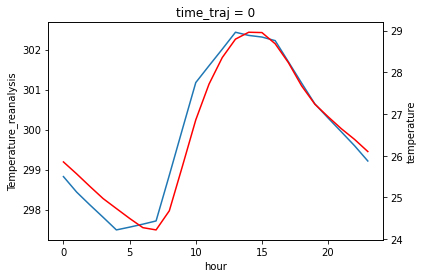

In [87]:
f,ax = plt.subplots()
ds['Temperature_reanalysis'].isel(time_traj=0).groupby(ds['hour']).mean().plot()
ds['temperature'].groupby(ds['hour']).mean().plot(ax = ax.twinx(), c='r')


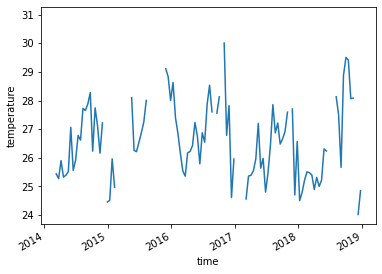

In [88]:
ds['temperature'].resample(time='14d').mean().plot()

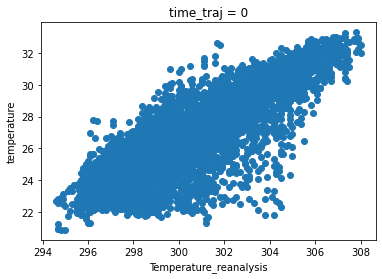

In [89]:
ds.isel(time_traj=0).sel(time=slice('2014','2014')).plot.scatter(x='Temperature_reanalysis', y = 'temperature')

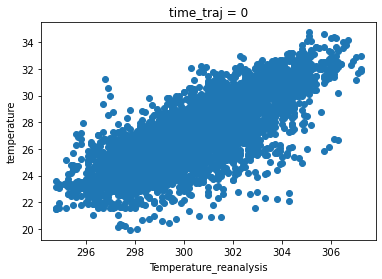

In [90]:
ds.isel(time_traj=0).sel(time=slice('2016-01','2016')).plot.scatter(x='Temperature_reanalysis', y = 'temperature')

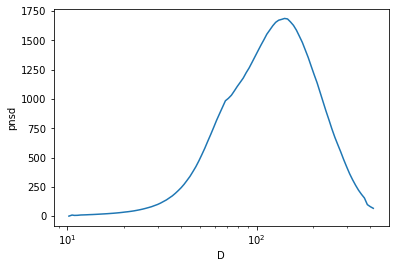

In [91]:
ds['pnsd'].mean('time').plot(xscale='log')

In [92]:
ds_nx = ds.resample(time='D').median()

<AxesSubplot:xlabel='time'>

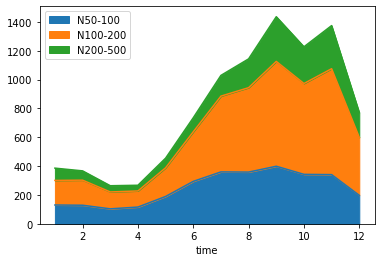

In [93]:
ds_nx['N50-100'] = ds_nx['N50-500']-ds_nx['N100-500']
ds_nx['N100-200'] = ds_nx['N100-500']-ds_nx['N200-500']
_df = ds_nx[['N50-100','N100-200','N200-500']].to_dataframe()

_df.groupby(_df.index.month).median().plot(kind='area', stacked='true',)#, alpha=.2)



In [94]:
ds['N50-500'].mean('time')

<xarray.DataArray 'N50-500' ()>
array(924.90856412)

In [95]:
ds

<xarray.Dataset>
Dimensions:                           (time: 25448, D: 104, time_traj: 121, timeUTC: 25448, timeUTC-4: 25448, limit: 2)
Coordinates:
  * time                              (time) datetime64[ns] 2014-03-10T15:00:...
  * D                                 (D) float64 10.2 10.6 10.9 ... 399.5 414.2
  * time_traj                         (time_traj) int64 0 1 2 3 ... 118 119 120
  * timeUTC                           (timeUTC) datetime64[ns] 2014-03-10T19:...
  * timeUTC-4                         (timeUTC-4) datetime64[ns] 2014-03-10T1...
  * limit                             (limit) <U6 'bottom' 'top'
Data variables: (12/40)
    pnsd                              (time, D) float64 6.811e-05 ... 20.85
    Pressure_reanalysis               (time, time_traj) float64 ...
    Potential_Temperature_reanalysis  (time, time_traj) float64 ...
    Temperature_reanalysis            (time, time_traj) float64 ...
    Rainfall                          (time, time_traj) float64 ...
    Mixing_Depth                      (time, time_traj) float64 ...
    ...                                ...
    WDir_73m                          (time) float64 56.47 93.43 ... nan nan
    precip                            (time) float64 0.0 0.0 0.0 ... nan nan nan
    PAR_in                            (time) float64 1.676e+03 826.7 ... nan nan
    PAR_out                           (time) float64 47.3 25.72 7.79 ... nan nan
    LW_atm                            (time) float64 434.7 446.8 ... nan nan
    LW_terr                           (time) float64 494.9 490.3 ... nan nan

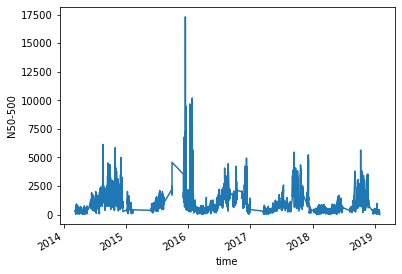

In [96]:
ds['N50-500'].plot()

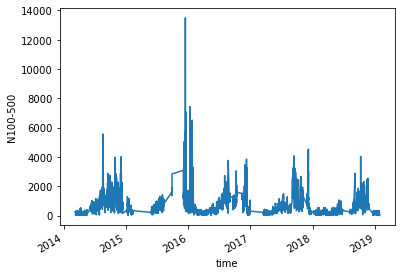

In [97]:
ds['N100-500'].plot()

In [98]:
ds['N100-500'].mean('time')

<xarray.DataArray 'N100-500' ()>
array(632.36555509)

In [99]:
ds['N200-500'].mean('time')

<xarray.DataArray 'N200-500' ()>
array(170.34908289)

### *Add ACSM data: 

In [100]:
ds = ds.assign({'OA':df_ATTO['org (ug m-3)'].resample('h').mean()})

(-10.0, 40.0)

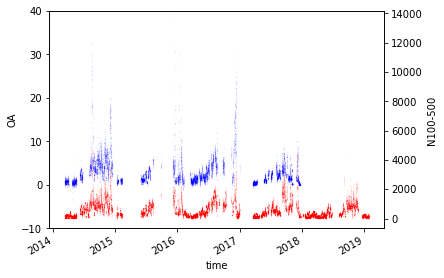

In [101]:
fig, ax = plt.subplots()
ds['OA'].plot(c = 'b', alpha=0.5, marker='.', linewidth=0, markersize=.1)

ds['N100-500'].plot(ax = ax.twinx(),c = 'r', alpha=0.5, marker='.', linewidth=0, markersize=.1)
ax.set_ylim([-10,40])

### *Add BC data: 

In [102]:
ds = ds.assign({'BC_conc':df_ATTO_bc['BC_conc'].resample('1h').mean()})


## Save dataset

In [103]:
ds.to_netcdf(path_comb_data_full_time)

In [104]:
ds = xr.open_dataset(path_comb_data_full_time)

In [105]:
ds

<xarray.Dataset>
Dimensions:                           (time: 25448, D: 104, time_traj: 121, timeUTC: 25448, timeUTC-4: 25448, limit: 2)
Coordinates:
  * time                              (time) datetime64[ns] 2014-03-10T15:00:...
  * D                                 (D) float64 10.2 10.6 10.9 ... 399.5 414.2
  * time_traj                         (time_traj) int64 0 1 2 3 ... 118 119 120
  * timeUTC                           (timeUTC) datetime64[ns] 2014-03-10T19:...
  * timeUTC-4                         (timeUTC-4) datetime64[ns] 2014-03-10T1...
  * limit                             (limit) object 'bottom' 'top'
Data variables: (12/42)
    pnsd                              (time, D) float64 ...
    Pressure_reanalysis               (time, time_traj) float64 ...
    Potential_Temperature_reanalysis  (time, time_traj) float64 ...
    Temperature_reanalysis            (time, time_traj) float64 ...
    Rainfall                          (time, time_traj) float64 ...
    Mixing_Depth                      (time, time_traj) float64 ...
    ...                                ...
    PAR_in                            (time) float64 ...
    PAR_out                           (time) float64 ...
    LW_atm                            (time) float64 ...
    LW_terr                           (time) float64 ...
    OA                                (time) float64 ...
    BC_conc                           (time) float64 ...

## Extra

Filter data for bc below 0.01 micro g/m3, or .05.

## JFM 

In [106]:
ds_jfm = ds.where(ds['time.month'].isin([1,2,3]))

In [107]:
_all = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<10000).resample(time='1D').median().count().values

_1 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<1).resample(time='1D').median().count().values

_p5 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.5).resample(time='1D').median().count().values

_p1 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.1).resample(time='1D').median().count().values

_p05 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.05).resample(time='1D').median().count().values

_p01 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.01).resample(time='1D').median().count().values

In [108]:
print(f'All data: \t \t {_all} days \n'
      f'BC less than 1: \t {_1} days \n'
      f'BC less than 0.5: \t {_p5} days \n'
      f'BC less than 0.1: \t {_p1} days \n'
      f'BC less than 0.05: \t {_p05} days \n'
      f'BC less than 0.01: \t {_p01} days \n'
     )

All data: 	 	 104 days 
BC less than 1: 	 104 days 
BC less than 0.5: 	 100 days 
BC less than 0.1: 	 65 days 
BC less than 0.05: 	 53 days 
BC less than 0.01: 	 36 days 



In [109]:
_ds_jfm_daily_med = ds_jfm.resample(time='1D').median()

In [110]:
_all = _ds_jfm_daily_med['OA'].where(_ds_jfm_daily_med['BC_conc'].fillna(0)<10000).count().values
_1 = _ds_jfm_daily_med['OA'].where(_ds_jfm_daily_med['BC_conc'].fillna(0)<1).count().values
_p5 = _ds_jfm_daily_med['OA'].where(_ds_jfm_daily_med['BC_conc'].fillna(0)<.5).count().values
_p1 = _ds_jfm_daily_med['OA'].where(_ds_jfm_daily_med['BC_conc'].fillna(0)<.1).count().values
_p05 = _ds_jfm_daily_med['OA'].where(_ds_jfm_daily_med['BC_conc'].fillna(0)<.05).count().values
_p01 = _ds_jfm_daily_med['OA'].where(_ds_jfm_daily_med['BC_conc'].fillna(0)<.01).count().values


In [111]:
print(f'All data: \t \t {_all} days \n'
      f'BC less than 1: \t {_1} days \n'
      f'BC less than 0.5: \t {_p5} days \n'
      f'BC less than 0.1: \t {_p1} days \n'
      f'BC less than 0.05: \t {_p05} days \n'
      f'BC less than 0.01: \t {_p01} days \n'
     )

All data: 	 	 104 days 
BC less than 1: 	 104 days 
BC less than 0.5: 	 94 days 
BC less than 0.1: 	 45 days 
BC less than 0.05: 	 39 days 
BC less than 0.01: 	 14 days 



(array([ 2., 11., 15., 17., 16., 10.,  5.,  7.,  3.,  4.,  2.,  2.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  1.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
         1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
         2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
         3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
         4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
         5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
         6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
         7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
         8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
         9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10. 

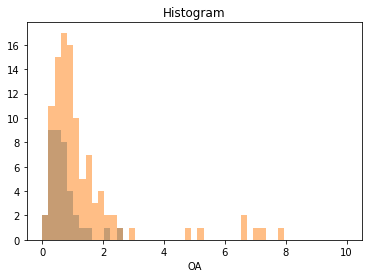

In [112]:
_ds_jfm_daily_med['OA'].where(_ds_jfm_daily_med['BC_conc'].fillna(0)<.05).plot.hist(bins=np.linspace(0,10), alpha=.5)

_ds_jfm_daily_med['OA'].plot.hist(bins=np.linspace(0,10), alpha = .5)

## FMAM

In [113]:
ds_jfm = ds.where(ds['time.month'].isin([2,3,4,5]))

In [114]:
_all = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<10000).resample(time='1D').median().count().values

_1 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<1).resample(time='1D').median().count().values

_p5 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.5).resample(time='1D').median().count().values

_p1 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.1).resample(time='1D').median().count().values

_p05 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.05).resample(time='1D').median().count().values

_p01 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.01).resample(time='1D').median().count().values

In [115]:
print(f'All data: \t \t {_all} days \n'
      f'BC less than 1: \t {_1} days \n'
      f'BC less than 0.5: \t {_p5} days \n'
      f'BC less than 0.1: \t {_p1} days \n'
      f'BC less than 0.05: \t {_p05} days \n'
      f'BC less than 0.01: \t {_p01} days \n'
     )

All data: 	 	 176 days 
BC less than 1: 	 176 days 
BC less than 0.5: 	 173 days 
BC less than 0.1: 	 158 days 
BC less than 0.05: 	 145 days 
BC less than 0.01: 	 85 days 



In [116]:
_ds_jfm_daily_med = ds_jfm.resample(time='1D').median()

In [117]:
_all = _ds_jfm_daily_med['OA'].where(_ds_jfm_daily_med['BC_conc'].fillna(0)<10000).count().values
_1 = _ds_jfm_daily_med['OA'].where(_ds_jfm_daily_med['BC_conc'].fillna(0)<1).count().values
_p5 = _ds_jfm_daily_med['OA'].where(_ds_jfm_daily_med['BC_conc'].fillna(0)<.5).count().values
_p1 = _ds_jfm_daily_med['OA'].where(_ds_jfm_daily_med['BC_conc'].fillna(0)<.1).count().values
_p05 = _ds_jfm_daily_med['OA'].where(_ds_jfm_daily_med['BC_conc'].fillna(0)<.05).count().values
_p01 = _ds_jfm_daily_med['OA'].where(_ds_jfm_daily_med['BC_conc'].fillna(0)<.01).count().values


In [118]:
print(f'All data: \t \t {_all} days \n'
      f'BC less than 1: \t {_1} days \n'
      f'BC less than 0.5: \t {_p5} days \n'
      f'BC less than 0.1: \t {_p1} days \n'
      f'BC less than 0.05: \t {_p05} days \n'
      f'BC less than 0.01: \t {_p01} days \n'
     )

All data: 	 	 176 days 
BC less than 1: 	 176 days 
BC less than 0.5: 	 173 days 
BC less than 0.1: 	 141 days 
BC less than 0.05: 	 114 days 
BC less than 0.01: 	 43 days 



(array([ 5., 22., 28., 25., 29., 15., 14.,  9.,  9.,  4.,  5.,  2.,  1.,
         1.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
         1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
         2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
         3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
         4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
         5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
         6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
         7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
         8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
         9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10. 

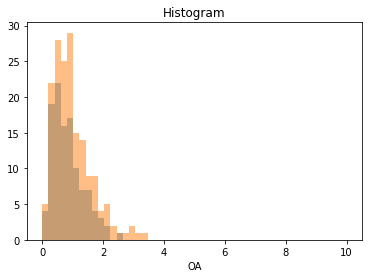

In [119]:
_ds_jfm_daily_med['OA'].where(_ds_jfm_daily_med['BC_conc'].fillna(0)<.05).plot.hist(bins=np.linspace(0,10), alpha=.5)

_ds_jfm_daily_med['OA'].plot.hist(bins=np.linspace(0,10), alpha = .5)

(array([ 5., 22., 28., 25., 29., 15., 14.,  9.,  9.,  4.,  5.,  2.,  1.,
         1.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
         1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
         2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
         3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
         4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
         5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
         6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
         7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
         8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
         9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10. 

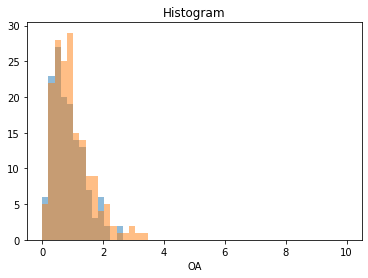

In [120]:
ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.05).resample(time='1D').median().plot.hist(bins=np.linspace(0,10), alpha=.5)

ds_jfm['OA'].resample(time='1D').median().plot.hist(bins=np.linspace(0,10), alpha = .5)

## JFMAM

In [121]:
ds_jfm = ds.where(ds['time.month'].isin([1,2,3,4,5]))

In [122]:
_all = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<10000).resample(time='1D').median().count().values

_1 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<1).resample(time='1D').median().count().values

_p5 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.5).resample(time='1D').median().count().values

_p1 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.1).resample(time='1D').median().count().values

_p05 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.05).resample(time='1D').median().count().values

_p01 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.01).resample(time='1D').median().count().values

In [123]:
print(f'All data: \t \t {_all} days \n'
      f'BC less than 1: \t {_1} days \n'
      f'BC less than 0.5: \t {_p5} days \n'
      f'BC less than 0.1: \t {_p1} days \n'
      f'BC less than 0.05: \t {_p05} days \n'
      f'BC less than 0.01: \t {_p01} days \n'
     )

All data: 	 	 212 days 
BC less than 1: 	 212 days 
BC less than 0.5: 	 208 days 
BC less than 0.1: 	 170 days 
BC less than 0.05: 	 151 days 
BC less than 0.01: 	 87 days 



In [124]:
_ds_jfm_daily_med = ds_jfm.resample(time='1D').median()

In [125]:
_all = _ds_jfm_daily_med['OA'].where(_ds_jfm_daily_med['BC_conc'].fillna(0)<10000).count().values
_1 = _ds_jfm_daily_med['OA'].where(_ds_jfm_daily_med['BC_conc'].fillna(0)<1).count().values
_p5 = _ds_jfm_daily_med['OA'].where(_ds_jfm_daily_med['BC_conc'].fillna(0)<.5).count().values
_p1 = _ds_jfm_daily_med['OA'].where(_ds_jfm_daily_med['BC_conc'].fillna(0)<.1).count().values
_p05 = _ds_jfm_daily_med['OA'].where(_ds_jfm_daily_med['BC_conc'].fillna(0)<.05).count().values
_p01 = _ds_jfm_daily_med['OA'].where(_ds_jfm_daily_med['BC_conc'].fillna(0)<.01).count().values


In [126]:
print(f'All data: \t \t {_all} days \n'
      f'BC less than 1: \t {_1} days \n'
      f'BC less than 0.5: \t {_p5} days \n'
      f'BC less than 0.1: \t {_p1} days \n'
      f'BC less than 0.05: \t {_p05} days \n'
      f'BC less than 0.01: \t {_p01} days \n'
     )

All data: 	 	 212 days 
BC less than 1: 	 212 days 
BC less than 0.5: 	 202 days 
BC less than 0.1: 	 142 days 
BC less than 0.05: 	 115 days 
BC less than 0.01: 	 43 days 



(array([ 5., 23., 29., 28., 33., 19., 14., 14., 12.,  8.,  6.,  4.,  1.,
         1.,  3.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  1.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
         1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
         2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
         3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
         4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
         5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
         6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
         7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
         8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
         9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10. 

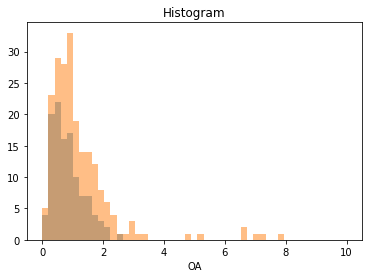

In [127]:
_ds_jfm_daily_med['OA'].where(_ds_jfm_daily_med['BC_conc'].fillna(0)<.05).plot.hist(bins=np.linspace(0,10), alpha=.5)

_ds_jfm_daily_med['OA'].plot.hist(bins=np.linspace(0,10), alpha = .5)

(array([ 5., 23., 29., 28., 33., 19., 14., 14., 12.,  8.,  6.,  4.,  1.,
         1.,  3.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  1.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
         1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
         2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
         3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
         4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
         5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
         6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
         7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
         8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
         9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10. 

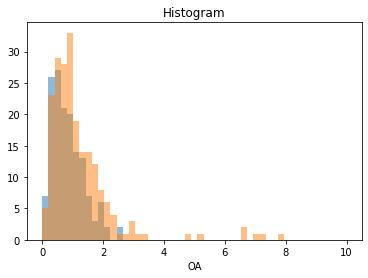

In [128]:
ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.05).resample(time='1D').median().plot.hist(bins=np.linspace(0,10), alpha=.5)

ds_jfm['OA'].resample(time='1D').median().plot.hist(bins=np.linspace(0,10), alpha = .5)

## MAM 

In [129]:
ds_jfm = ds.where(ds['time.month'].isin([3,4,5]))

In [130]:
_all = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<10000).resample(time='1D').median().count().values

_1 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<1).resample(time='1D').median().count().values

_p5 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.5).resample(time='1D').median().count().values

_p1 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.1).resample(time='1D').median().count().values

_p05 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.05).resample(time='1D').median().count().values

_p01 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.01).resample(time='1D').median().count().values

In [131]:
print(f'All data: \t \t {_all} days \n'
      f'BC less than 1: \t {_1} days \n'
      f'BC less than 0.5: \t {_p5} days \n'
      f'BC less than 0.1: \t {_p1} days \n'
      f'BC less than 0.05: \t {_p05} days \n'
      f'BC less than 0.01: \t {_p01} days \n'
     )

All data: 	 	 160 days 
BC less than 1: 	 160 days 
BC less than 0.5: 	 160 days 
BC less than 0.1: 	 153 days 
BC less than 0.05: 	 142 days 
BC less than 0.01: 	 84 days 



(array([ 5., 21., 24., 22., 25., 13., 12.,  9.,  9.,  4.,  5.,  2.,  1.,
         1.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
         1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
         2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
         3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
         4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
         5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
         6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
         7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
         8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
         9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10. 

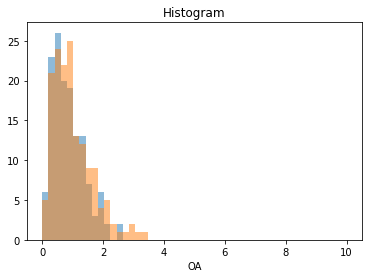

In [132]:
ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.05).resample(time='1D').median().plot.hist(bins=np.linspace(0,10), alpha=.5)

ds_jfm['OA'].resample(time='1D').median().plot.hist(bins=np.linspace(0,10), alpha = .5)

## FMA 

In [133]:
ds_jfm = ds.where(ds['time.month'].isin([2,3,4]))

In [134]:
_all = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<10000).resample(time='1D').median().count().values

_1 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<1).resample(time='1D').median().count().values

_p5 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.5).resample(time='1D').median().count().values

_p1 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.1).resample(time='1D').median().count().values

_p05 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.05).resample(time='1D').median().count().values

_p01 = ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.01).resample(time='1D').median().count().values

In [135]:
print(f'All data: \t \t {_all} days \n'
      f'BC less than 1: \t {_1} days \n'
      f'BC less than 0.5: \t {_p5} days \n'
      f'BC less than 0.1: \t {_p1} days \n'
      f'BC less than 0.05: \t {_p05} days \n'
      f'BC less than 0.01: \t {_p01} days \n'
     )

All data: 	 	 120 days 
BC less than 1: 	 120 days 
BC less than 0.5: 	 117 days 
BC less than 0.1: 	 103 days 
BC less than 0.05: 	 96 days 
BC less than 0.01: 	 63 days 



(array([ 4., 18., 24., 17., 19., 12., 10.,  6.,  4.,  1.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
         1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
         2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
         3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
         4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
         5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
         6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
         7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
         8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
         9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10. 

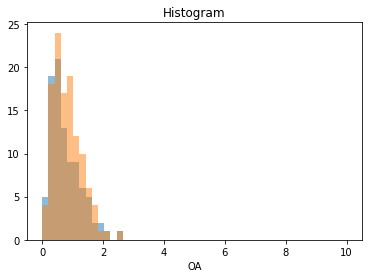

In [136]:
ds_jfm['OA'].where(ds_jfm['BC_conc'].fillna(0)<.05).resample(time='1D').median().plot.hist(bins=np.linspace(0,10), alpha=.5)

ds_jfm['OA'].resample(time='1D').median().plot.hist(bins=np.linspace(0,10), alpha = .5)

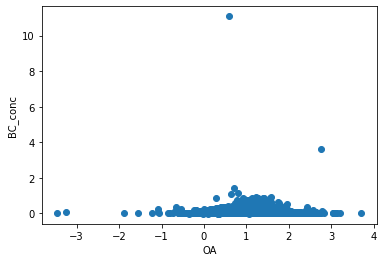

In [137]:
ds_jfm.plot.scatter(x='OA',y='BC_conc')

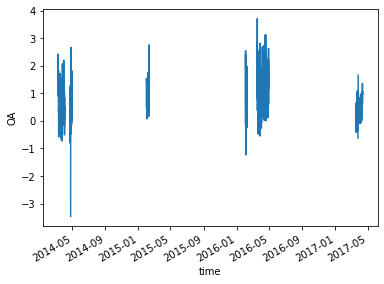

In [138]:
ds_jfm['OA'].plot()

(array([203., 312., 367., 365., 313., 252., 211., 156.,  82.,  68.,  49.,
         19.,  22.,  11.,   3.,   3.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.]),
 array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
         1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
         2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
         3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
         4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
         5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
         6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
         7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
         8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
       

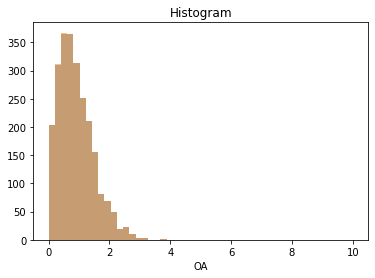

In [139]:
ds_jfm['OA'].where(ds_jfm['BC_conc']<2).plot.hist(bins=np.linspace(0,10), alpha=.5)

ds_jfm['OA'].plot.hist(bins=np.linspace(0,10), alpha = .5)

## Testing bc filtering 